In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import joblib

In [2]:
# File paths
be_file = r"/Users/livalacaisse/Documents/DataScience/CO2/RidgeModel_Code/BE_Cleaned.csv"
model_file = "best_hybrid_rf_model.joblib"  

In [3]:
# Data types specification (same as before)
dtype_spec = {
    'Em_on_target': 'int64',
    'Fuel consumption': 'float32',
    'Engine_cm3': 'float32',
    'Kg_veh': 'float32',
    'Test_mass': 'float32',
    'Power_KW': 'float32',
    'El_Consumpt_whkm': 'float32',
    'Energy': 'category',
    'Fuel_mode': 'category',
    'Brand': 'category',
    'Veh_type': 'category',
    'Veh_Model': 'category',
    'Version': 'category',
    'Veh_Category': 'category',
    'year': 'int64',
    'Country': 'category'
}

In [4]:
# Load the best model
best_model = joblib.load(model_file)
print(f"Loaded model from {model_file}")

Loaded model from best_hybrid_rf_model.joblib


In [5]:
# Load new dataset
be_clean = pd.read_csv(be_file, dtype=dtype_spec)

In [6]:
# Filter only hybrid petrol and hybrid diesel vehicles
hybrid_df = be_clean[be_clean['Energy'].isin(['hybrid petrol', 'hybrid diesel'])]

In [7]:
# Define features for hybrid vehicles
features = ['Engine_cm3', 'Axle_width_other_mm', 'Axle_width_steer_mm', 'Fuel consumption', 
            'El_Consumpt_whkm', 'Power_KW', 'Electric range (km)', 'year', 'Wheelbase_mm', 
            'Eco-innovation program', 'Test_mass', 'Kg_veh']

In [8]:
# Prepare the data
X = hybrid_df[features]
y = hybrid_df['CO2_wltp']

In [9]:
# Log transformation to address skewness
X_log = np.log1p(X)
y_log = np.log1p(y)

In [10]:
# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

In [11]:
# Make predictions
y_pred = best_model.predict(X_scaled)

# Inverse log transformation for evaluation
y_exp = np.expm1(y_log)
y_pred_exp = np.expm1(y_pred)

# Evaluation of the model on the new dataset
r2 = r2_score(y_exp, y_pred_exp)
mse = mean_squared_error(y_exp, y_pred_exp)

In [12]:
# Results reporting
print(f"R^2 Score on new dataset: {r2}")
print(f"Mean Squared Error on new dataset: {mse}")

R^2 Score on new dataset: 0.7890764222838171
Mean Squared Error on new dataset: 23.67462409874748


In [13]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

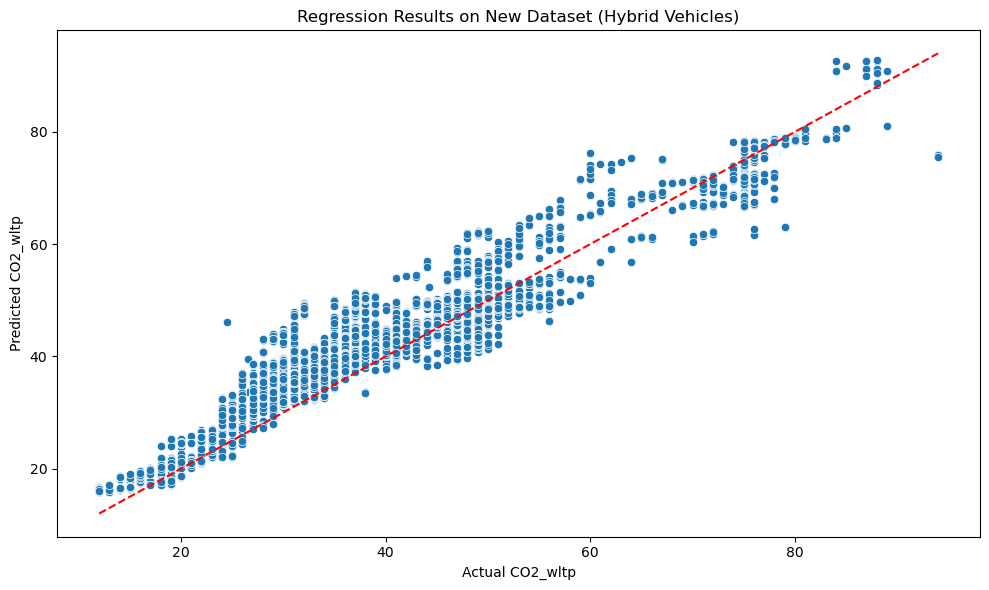

In [14]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted for new dataset
sns.scatterplot(x=y_exp, y=y_pred_exp)
plt.xlabel('Actual CO2_wltp')
plt.ylabel('Predicted CO2_wltp')
plt.title('Regression Results on New Dataset (Hybrid Vehicles)')
plt.plot([min(y_exp), max(y_exp)], [min(y_exp), max(y_exp)], color='red', linestyle='--')

plt.tight_layout()
plt.show()